# Laboratory Session 4

## Exercise 1 - Six Boxes Toy Model : inference
Write an R program that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

## Exercise 2 - Six Boxes Toy Model: simulation
Consider again the six boxes toy model of the previous exercise and write a simulation
program that:
1) selects a random box
2) makes random sampling from the box
3) prints on the standard output the probability of selecting each box
4) plots the probability for each box as a function of the number of trial

In [135]:
library(ggplot2)
library(reshape2)
library(tibble)

six_boxes <- function(extractions){

    n_boxes <- 6
    box_size <- n_boxes-1
    # The prior is the same for each box
    p_box <- 1/n_boxes

    p_w <- sum(0:box_size)*p_box/box_size
    p_b <- 1 - p_w
    # with the assumption for the balls distribution
    
    prior <- p_box
    posteriors <- matrix(rep(prior,n_boxes*(length(extractions)+1)),c(length(extractions)+1,n_boxes))
    for(i in 1:length(extractions)){
        ex <- extractions[i]
        priors <- posteriors[i,]
        lhoods <- 1*ex+(-1)**ex*box_size:0/box_size
        almost_posts <- lhoods*priors
        evidence <- sum(almost_posts)
        posts <- almost_posts/evidence
        posteriors[i+1,] <- posts
    }
    
    posteriors <- tibble(as.data.frame(posteriors))
    colnames(posteriors) <- c('H_0', 'H_1', 'H_2', 'H_3', 'H_4', 'H_5')
    posteriors['Extraction'] <- 0:length(extractions)
    df <- melt(posteriors, id.vars='Extraction', variable.name = 'series')
    plotties <- ggplot(df, aes(Extraction,value)) + geom_line(aes(colour = series)) + ggtitle('Posterior probability for each box')
    plotties
}

extractions <- function(size){
    box_number <- sample(0:5,1)
    box <- rep(0,5)
    if(box_number>0) box[1:box_number] <- rep(1,box_number)

    message('Sampling ', size, ' times from box ', box_number)
    return(sample(box,size,replace=TRUE))
}

simulate <- function(size){
    balls <- extractions(size)
    six_boxes(balls)
}

Sampling 12 times from box 4



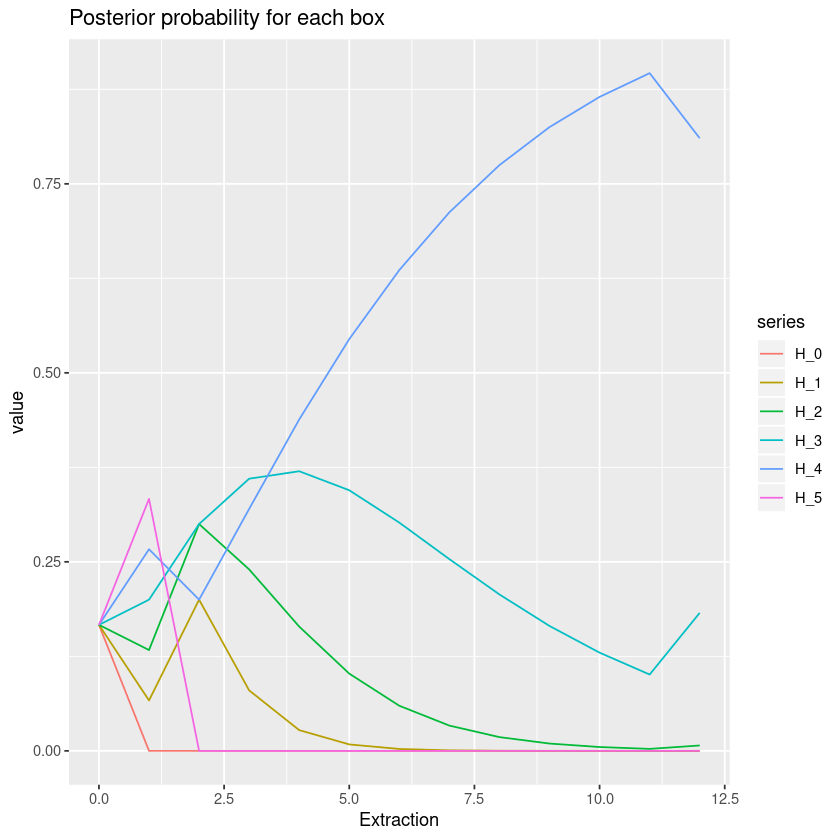

In [139]:
simulate(12)

## Exercise 3
- An important property of the gamma distribution is the so-called _reproductive property_
- given a sequence of independent random variable $X_j ∼ \text{Gamma}(\alpha_j, \beta)$, it follows that
$$
\begin{align}
Y=\sum_j X_j\to Y ~ \text{Gamma}(\alpha,\beta), \alpha = \sum_j \alpha_j
\end{align}
$$
if $\alpha = m$ is an integer, a random variable from gamma distribution $\text{Gamma}(m, \beta)$ (also known as Erlang distribution) can be obtained by summing m independent exponential
random variables $X_j ∼ \text{Exp}(\beta)$:
$$
\begin{align}
Y=\frac{1}{\beta}\sum_j(-\ln U_j)=-\frac{1}{\beta}\ln\prod_j U_j
\end{align}
$$

Write an algorithm to sample variables from an Erlang distribution $\text{Gamma}(m, \beta)$


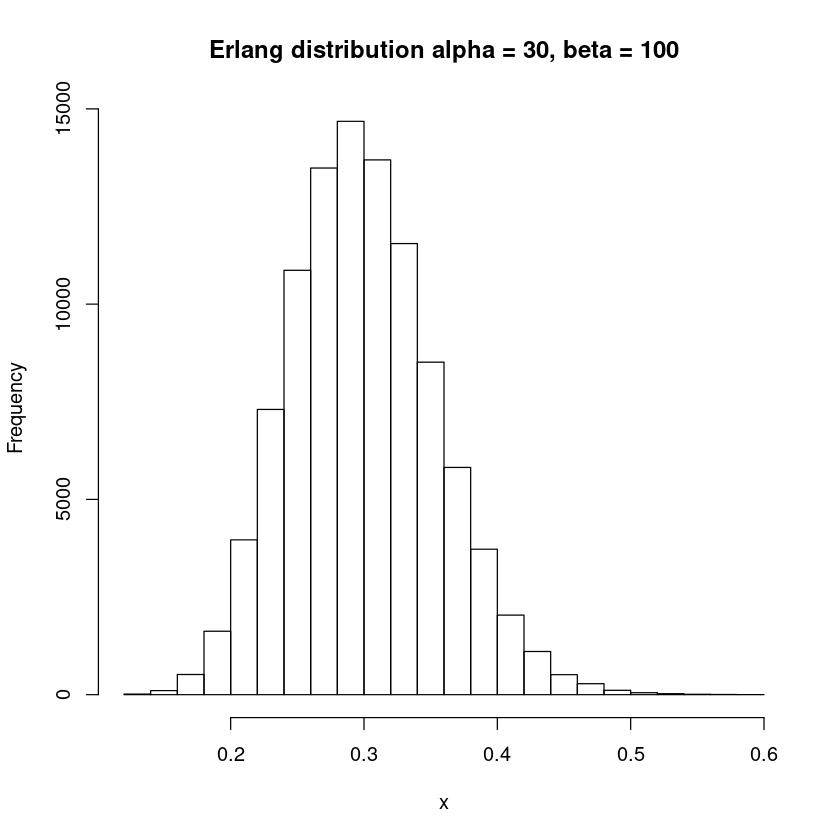

In [9]:
int_erlang <- function(N,m,bet) replicate(N,-sum(log(runif(m)))/bet)
hist(int_erlang(100000,30,100), main = 'Erlang distribution alpha = 30, beta = 100', xlab = 'x')

## Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.

Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

In [4]:
mid_sq_alg <- function(input){
    in_digits <- length(unlist(strsplit(as.character(input),"")))
    number <- unlist(strsplit(as.character(input**2),""))
    sq_digits <- length(number)
    i <- 2
    # If the current start digit of the squared number is zero,
    # we review whether there would be enough digits left to trim if we started from the next digit.
    # We are trying to get a number with the same number of digits as the input, not more, not less.
    while(number[i]=='0' & in_digits+i<sq_digits){
        i <- i+1
    }
    new_number <- number[i:(in_digits+i-1)]
    new_number <- as.numeric(paste(new_number, collapse=""))
    return(new_number)
}


In [5]:
mid_sq_alg(123098)

[1] 515311